<style>
@media print
{
h2 {page-break-before:always}
}
</style>

# Homework 02 Solutions

#### Brown University  
#### DATA 1010  
#### Fall 2019

## Problem 1

Use matrix differentiation to find the vector $\mathbf{x} \in \mathbb{R}^n$ which minimizes the expression $|W(A\mathbf{x} − \mathbf{b})|^2$, where A is an $m \times n$ matrix and W is an $m \times m$ matrix. You may assume that $WA$ is full-rank.


### Solution:

We write the given expression as $(W(A\mathbf{x} − \mathbf{b}))'W(A\mathbf{x} − \mathbf{b})$, which expands to

$$\mathbf{x}' A'W'WA\mathbf{x} − \mathbf{b}'W'WA\mathbf{x} − \mathbf{x}' A'W'W\mathbf{b} + \mathbf{b}'W'W\mathbf{b}.$$

Differentiating with respect to $\mathbf{x}$, we get 

$$\mathbf{x}' A'W'WA - \mathbf{b}'W'WA$$

Setting this equal to 0, we get 

$$\mathbf{x}'A'W'WA = \mathbf{b}'W'WA.$$

Transposing both sides and solving for $\mathbf{x}$, we find that $\mathbf{x} = (A'W'WA)^{-1}AW'W\mathbf{b}$. The step of inverting $A'W'WA = (WA)'(WA)$ is valid because it has the same rank as $WA$, which assumed to be $m$.

## Problem 2

Find the derivative of $|\mathbf{x}|$ with respect to $\mathbf{x}$. Hint: write $|\mathbf{x}|$ as $\sqrt{\mathbf{x}'\mathbf{x}}$ and use the chain rule, which says that if $g: \mathbb{R}_n \rightarrow \mathbb{R}$ and $f: \mathbb{R} → \mathbb{R}$, then

 $$\frac{\partial}{\partial \mathbf{x}}f(g(\mathbf{x})) = \frac{\operatorname{d}f}{\operatorname{d}t}(g(\mathbf{x}))\frac{\partial g}{\partial \mathbf{x}}(\mathbf{x}).$$

Interpret your answer geometrically and explain why it makes sense.



### Solution:

We have

$$\frac{\partial}{\partial \mathbf{x}}(\sqrt{\mathbf{x'x}}) = \frac{1}{2|\mathbf{x}|}2\mathbf{x}' = \frac{\mathbf{x}'}{|\mathbf{x}|}$$

This is the unit vector in the direction of $\mathbf{x}$. This makes sense because the direction in which the length of the vector from 0 to $\mathbf{x}$ increases the fastest is directly away from the origin, and the rate of increase in that direction is 1 distance unit per distance unit.

## Problem 3

(i) Find the line through the origin for which the sum of squared distances from the line to points in the set 

$$\{(3, −1),(2, 4),(−1, −1),(−2, 2),(−3, 1),(5, −1),(−2, 4)\}$$

is as small as possible.

(ii) Find the slope of the zero-intercept line of best fit for these points using the formula $m = (A'A)^{-1}A'\mathbf{b}$, where $A$ is a column vector whose entries are the $x$ coordinates of the points and where $\mathbf{b}$ is a column vector whose components are the $y$-components of the points (in the same order). Recall that this is the line which minimizes $\sum_i(mx_i - y_i)^2$ where ($x_i$
, $y_i$) ranges over the given points.

(iii) Draw both of these lines and explain why they are not the same even though they both minimize a sum of squared distances.
```Julia
using Plots, LinearAlgebra
A = [3 2 -1 -2 -3 5 -2; -1 4 -1 2 1 -1 4]
scatter(A[1,:], A[2,:])
```



### Solution:

(i) The line through the origin which gets closest to the given points (in the sum-of-squared-distances sense) is the one running along the first column of U in the SVD of

$$\begin{bmatrix}
    3 & 2 & -1 & -2 & -3 & 5 & -2\\
    -1 & 4 & -1 & 2 & 1 & -1 & 4
\end{bmatrix}$$

(Or, equivalently, the first column of V in the SVD of the transpose of this matrix). The unit vector representing this line is $[−0.865, 0.502]$.

(ii) Using the given formula, we find that the line of best fit through the origin has slope $-\frac{1}{4}$.

In [1]:
using Plots, LinearAlgebra
A = [3 2 -1 -2 -3 5 -2; -1 4 -1 2 1 -1 4]
scatter(A[1,:], A[2,:])
u, Ε, v = svd(A)
u

2×2 Array{Float64,2}:
 -0.86491   0.501927
  0.501927  0.86491 

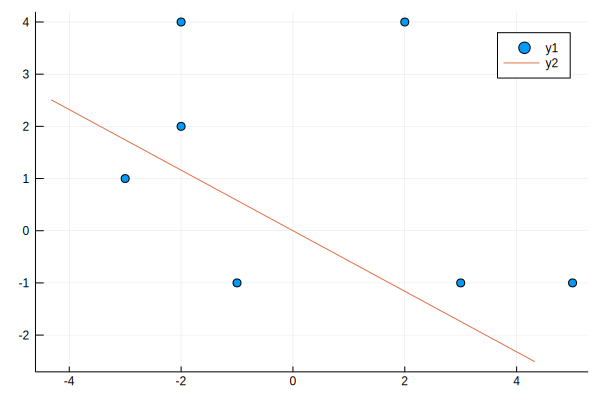

In [2]:
plot!([(5*(-0.86491), 5*(0.501927)), (5*(0.86491), 5*(-0.501927))])

In [3]:
A = transpose([3 2 -1 -2 -3 5 -2])
b = transpose([-1 4 -1 2 1 -1 4])
m = inv(transpose(A)*A)*transpose(A)*b

1×1 Array{Float64,2}:
 -0.25

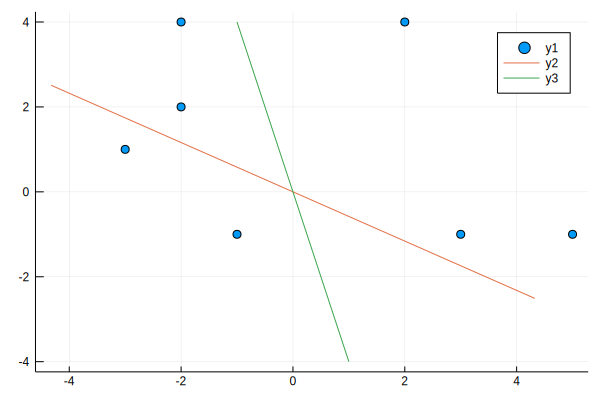

In [4]:
plot!([(-1, 4), (1, -4)])



(iii) These are not the same because the singular vector minimizes the sum of the squared (perpendicular) distances from the line to the points, while the the best-fit minimizes the sum of vertical squared distances.

## Problem 4

Find a value of $x$ which is less than $1$ and for which `1 + x + x + x > 1 + 3x` returns `true` . Explain this behavior.



### Solution:

Let $x$ be a number slightly larger than the gap between 1 and the first representable value greater than 1, like $2^{-53} + 2^{-57}$. This number is a bit larger than half the gap $\epsilon$ between representable values between 1 and 2. Then each addition of $x$ takes us up to the next representable float value. Meanwhile, $3x$ is less than $2\epsilon$ and will therefore be smaller than the result of successively adding $x$ three times.

## Problem 5

Explain why the following function returns a value rather than running forever. Explain why it returns the particular value that it returns.

```Julia
function countdown()
    x = 1.0
    ctr = 0
    while x > 0.0
        x /= 2
        ctr += 1
    end
    ctr
end
```



### Solution:

The function returns 1075. The reason it does not run forever is that eventually `x` reaches the smallest representable number ($2^{-1074}$), at which point halving results in rounding to zero. It takes 1074 steps to get to $2^{-1074}$ and then one more to get to a number which rounds to zero, for a total of 1075 steps.

## Problem 6

Show that an invertible, square matrix and its inverse have the same condition number.



### Solution:

If $A = U\Sigma V'$ is the SVD of $A$, then the SVD of the inverse of $A$ is $V\Sigma^{-1}U'$. Therefore, the singular values of the inverse of $A$ are the reciprocals of the singular values of $A$. Thus the largest singular value of the inverse of $A$ is the reciprocal of the smallest singular value of $A$, and the smallest singular value is the reciprocal of $A'$s largest. Thus the largest-to-smallest ratio of $A$'s singular values and is equal to the largest-to-smallest ratio of $A^{-1}$.

## Problem 7

Consider the $n \times n$ Frank matrix $F_n$, defined as shown in the code block below.

```Julia
function frankmatrix(n)
    A = zeros(n,n)
    for i=1:n
        for j=1:n
            if j == i-1
                A[i,j] = n + 1 - i
            elseif j ≥ i
                A[i,j] = n + 1 - j
            end
        end
    end
    A
end
```

Find $F^{-1}_n \mathbf{v}$, where $\mathbf{v} \in \mathbb{R}_n$ has all components equal to 1, by inspection. (Generate $F_n$ for some small values of $n$ and look at it).

Evaluate ` frankmatrix(n) \ ones(n) ` for $n \in {10, 15, 20, 25, 30}$ and calculate the norm of the difference between this numerical solution and the true solution. Compare your result to the product of `eps()` (which equals $2^{−52}$, the gap between $1$ and the nearest representable $64$-bit floating point) and the condition number of $F_n$ (which can be calculated using the function `cond`). Hint: a good way to do this comparison is to plot the log of each of these quantities over the specified range of $n$ values.

Based on your findings, comment on whether the algorithm being used for `\` is stable.



### Solution:

We calculate the error and plot it as a function of n, as well as computing the condition number and plotting that:

In [5]:
function frankmatrix(n)
    A = zeros(n,n)
    for i=1:n
        for j=1:n
            if j == i-1
                A[i,j] = n + 1 - i
            elseif j ≥ i
                A[i,j] = n + 1 - j
            end
        end
    end
    A
end

frankmatrix (generic function with 1 method)

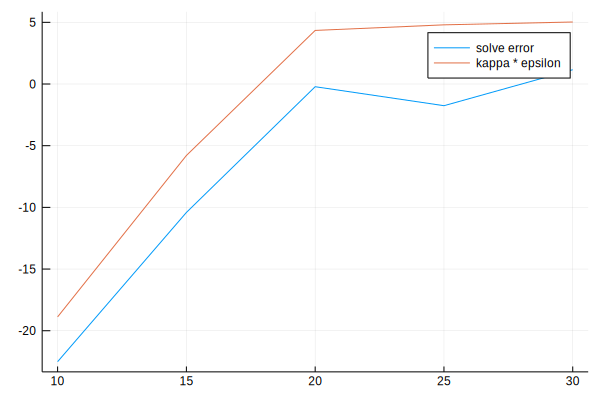

In [6]:
function solve_error(n) 
    A = frankmatrix(n) 
    b = ones(n) 
    x=A\b 
    norm(x - [zeros(n-1);[1]]) 
end

r = 10:5:30
plot(r,[log(solve_error(k)) for k=r], label="solve error") 
plot!(r,[log(cond(frankmatrix(k))*eps()) for k=r], label = "kappa * epsilon")

We see that the error is actually less than $\kappa(F_n)\epsilon$. Even though the error is large when $n$ is large, it is not large compared to the condition number of the matrix. Therefore, the algorithm used for `\` does appear to be stable.

## Problem 8

Consider the function $f(x) = (x^4 - 2x^3 - x^2 + 3x - 1)\operatorname{e}^{-x^2/4}$. Implement the gradient descent algorithm for finding the minimum of this function. 

<img src="polynomial-minimize.svg" style="float: right;" width=450px>

 * If the learning rate is $\epsilon = 0.1$, which values of
      $x_0$ have the property that $f(x_n)$ is close to the global
      minimum of $f$ when $n$ is large? 
 * Is there a starting value $x_0$ between $-2$ and $-1$ and a
      learning rate $\epsilon$ such that the gradient descent
      algorithm does not reach the global minimum of $f$? Use
      the graph for intuition.
      
      


### Solution:

The following is an implementation of gradient descent: 

In [7]:
using LinearAlgebra, ForwardDiff
function graddescent(f,x0,ε,threshold)
    ForwardDiff.derivative(f, x)
    x = x0
    while abs(df(x)) > threshold
        x = x - ε*df(x)
    end
    x
end
f(t) = exp(-t^2/4)*(t^4 - 2t^3 - t^2 + 3t - I)

f (generic function with 1 method)

* Trying various values of $x_0$, and looking at the graph, we conjecture that the global minimum is reached when the starting value $x_0$ is between the first two points where $f$ has a local maximum (approximately $-2.83$ and $0.145$). Between $0.145$ and the next local maximum (approximately $2.94$), the algorithm leads us to the local minimum around $x = 1.45$. Outside the interval from the first local maximum the last, the sequence of iterates appears to head off to $-\infty$ or $+\infty$.

* Skipping over the global minimum to the local one requires choosing $\epsilon$ large enough that the first jump skips over the local maximum at $0.145$. A little experimentation shows that $x = -1.5$ and $\epsilon = 0.25$ works (among many other possibilities).

## Problem 9

Calculate, by hand, the gradient and Hessian of the function shown below. Show that the values returned by the ForwardDiff package are correct.

In [8]:
using ForwardDiff
f(x,y) = x^2 + y^2 - 2y
f(v::Vector) = f(v...) # equivalent to f(v[1],v[2]) 
x = [1.5,-3.25]
ForwardDiff.gradient(f,x)

2-element Array{Float64,1}:
  3.0
 -8.5

In [9]:
ForwardDiff.hessian(f,x)

2×2 Array{Float64,2}:
 2.0  0.0
 0.0  2.0



### Solution:

The gradient is $[2x, 2y − 2]$. Therefore, the gradient at $[1.5, −3.25]$ is $[3.0, −8.5]$. This is indeed the value returned by `ForwardDiff.gradient`.

The Hessian is

$$\begin{bmatrix} \partial^2_xf & \partial_{xy}f \\ \partial_{xy}f & \partial^2_yf \end{bmatrix} = \begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}.$$

This is the matrix returned by `ForwardDiff.hessian`.

## Problem 10

Consider the following PRNG (which was actually widely used in the early 1970s): we begin with an odd positive integer $a_1$ less than $2^{31}$ and for all $n \geq 2$, we define $a_n$ to be the remainder when dividing $65539a_{n-1}$ by $2^{31}$.

Use Julia to calculate $9a_{3n+1} - 6 a_{3n+2} + a_{3n+3}$ for the first $10^6$ values of $n$, and show that there are only \textit{15} unique values in the resulting list (!). Explain what you would see if you plotted many points of the form $(a_{3n+1},a_{3n+2},a_{3n+3})$ in three-dimensional space.


### Solution:

We generate the first $3,000,003$ elements of the sequence and convert the suggested linear combination into set to see how many distinct elements it contains. Indeed, there are only 15:
```Julia
A = [seed]
for i=1:3*10^6+2
    push!(A,mod(65539*A[end],2^31)) 
end
length(Set([[9,-6,1]⋅A[3n+1:3n+3] for n=0:10^6])) 
# returns 15
```
In other words, splitting the sequence into blocks of three and plotting the points in 3D space shows us a collection of 15 planes such that every point lies on one of those planes.